In [270]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape

x = lfw_people.data
y = lfw_people.target

print(n_samples,h,w)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=47)

1288 50 37


(862, 50, 37)
(862,)
(426, 50, 37)
(426,)


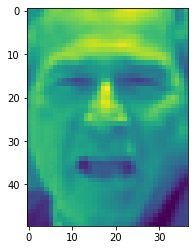

5

In [275]:
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)


x_train = x_train.reshape(x_train.shape[0],h,w)
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.reshape(x_test.shape[0],h,w)
x_test = x_test.astype('float32')
x_test /= 255

plt.imshow(x_test[0])
plt.show()
y_test[2]

In [272]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape(input_shape=(50, 37,), target_shape=(50, 37, 1)),

    tf.keras.layers.Conv2D(kernel_size=3, filters=12, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(scale=False, center=True),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(kernel_size=6, filters=24, padding='same', use_bias=False, strides=2),
    tf.keras.layers.BatchNormalization(scale=False, center=True),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(kernel_size=6, filters=32, padding='same', use_bias=False, strides=2),
    tf.keras.layers.BatchNormalization(scale=False, center=True),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(200, use_bias=False),
    tf.keras.layers.BatchNormalization(scale=False, center=True),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_15 (Reshape)         (None, 50, 37, 1)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 50, 37, 12)        108       
_________________________________________________________________
batch_normalization_56 (Batc (None, 50, 37, 12)        36        
_________________________________________________________________
activation_56 (Activation)   (None, 50, 37, 12)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 25, 19, 24)        10368     
_________________________________________________________________
batch_normalization_57 (Batc (None, 25, 19, 24)        72        
_________________________________________________________________
activation_57 (Activation)   (None, 25, 19, 24)      

In [269]:
BATCH_SIZE = 64
EPOCHS = 10
steps_per_epoch = 862/BATCH_SIZE

def lr_decay(epoch):
    return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

history = model.fit(x_train, steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                    validation_data=y_train, validation_steps=1, callbacks=[lr_decay_callback])

TypeError: in converted code:

    C:\Users\rasmu\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\data_adapter.py:340 slice_batch_indices
        first_k_indices = array_ops.slice(indices, [0], [num_in_full_batch])
    C:\Users\rasmu\Anaconda3\lib\site-packages\tensorflow_core\python\ops\array_ops.py:951 slice
        return gen_array_ops._slice(input_, begin, size, name=name)
    C:\Users\rasmu\Anaconda3\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py:8450 _slice
        "Slice", input=input, begin=begin, size=size, name=name)
    C:\Users\rasmu\Anaconda3\lib\site-packages\tensorflow_core\python\framework\op_def_library.py:477 _apply_op_helper
        repr(values), type(values).__name__, err))

    TypeError: Expected int32 passed to parameter 'size' of op 'Slice', got [832.0] of type 'list' instead. Error: Expected int32, got 832.0 of type 'float' instead.


In [237]:
val_loss, val_acc = model.evaluate(x_test, y_test) #Calculate validation loss and validation accuracy
print(val_loss, val_acc) 

ValueError: You are passing a target array of shape (426, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

In [238]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [154]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [155]:
predictions = new_model.predict(x_test)

In [156]:
import numpy as np

print(np.argmax(predictions[0]))

3


TypeError: Invalid shape (108,) for image data

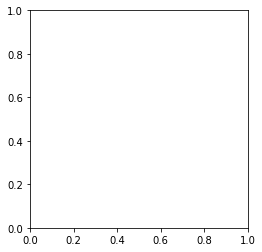

In [157]:
plt.imshow(x_test[0])
plt.show()